<a href="https://colab.research.google.com/github/Pranavlovescode/Bangluru-Price-predictor/blob/master/bangluru_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [231]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error,r2_score

In [4]:
df = pd.read_csv('bengaluru_house_prices.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df2 = df.drop(['area_type','availability','society','balcony'],axis=1)
df2.head(10)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
5,Whitefield,2 BHK,1170,2.0,38.00
6,Old Airport Road,4 BHK,2732,4.0,204.00
7,Rajaji Nagar,4 BHK,3300,4.0,600.00
8,Marathahalli,3 BHK,1310,3.0,63.25
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00


In [104]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [113]:
df2['bhk'] = df2['size'].astype(str).apply(lambda x : float(x.split(' ')[0]))
df3 = df2.drop(['size'],axis=1)
df3.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2.0
1,Chikka Tirupathi,2600,5.0,120.00,4.0
2,Uttarahalli,1440,2.0,62.00,3.0
3,Lingadheeranahalli,1521,3.0,95.00,3.0
4,Kothanur,1200,2.0,51.00,2.0


In [112]:
df3['bhk'].dtype

dtype('float64')

In [132]:
df3.isnull().sum()
# df3.head()

location       1
total_sqft     0
bath          73
price          0
bhk           16
dtype: int64

In [115]:
df3['location'].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [116]:
df4 = df3.copy()
df4

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2.0
1,Chikka Tirupathi,2600,5.0,120.00,4.0
2,Uttarahalli,1440,2.0,62.00,3.0
3,Lingadheeranahalli,1521,3.0,95.00,3.0
4,Kothanur,1200,2.0,51.00,2.0
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5.0
13316,Richards Town,3600,5.0,400.00,4.0
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2.0
13318,Padmanabhanagar,4689,4.0,488.00,4.0


In [117]:
df4['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [118]:
def getValues(x):
    try:
        float(x)
    except:
        return False
    return True

df4[~df4['total_sqft'].apply(getValues)].head(10)

,location,total_sqft,bath,price,bhk
56,Devanahalli,3010 - 3410,NaN,192.000,4.0
81,Hennur Road,2957 - 3450,NaN,224.500,4.0
122,Hebbal,3067 - 8156,4.0,477.000,4.0
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2.0
165,Sarjapur,1145 - 1340,2.0,43.490,2.0
188,KR Puram,1015 - 1540,2.0,56.800,2.0
224,Devanahalli,1520 - 1740,NaN,74.820,3.0
410,Kengeri,34.46Sq. Meter,1.0,18.500,1.0
549,Hennur Road,1195 - 1440,2.0,63.770,2.0
579,Sarjapur Road,1200 - 2400,NaN,34.185,NaN


In [119]:
def convert_to_float(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

convert_to_float('1015 - 1540')

1277.5

In [120]:
df5 = df4.copy()
df5['area'] = df5['total_sqft'].apply(convert_to_float)
df5 = df5.drop(['total_sqft'],axis=1)

In [121]:
df6 = df5.copy()
df6['price_per_area'] = df6['price']*100000/df6['area']
df6.head()

,location,bath,price,bhk,area,price_per_area
0,Electronic City Phase II,2.0,39.07,2.0,1056.0,3699.810606
1,Chikka Tirupathi,5.0,120.00,4.0,2600.0,4615.384615
2,Uttarahalli,2.0,62.00,3.0,1440.0,4305.555556
3,Lingadheeranahalli,3.0,95.00,3.0,1521.0,6245.890861
4,Kothanur,2.0,51.00,2.0,1200.0,4250.000000


In [198]:
df6['area'].fillna(df6['area'].median(),inplace=True)
df6['bhk'].fillna(df6['bhk'].median(),inplace=True)
df6['bath'].fillna(df6['bath'].median(),inplace=True)
df6['price_per_area'].fillna(df6['price_per_area'].median(),inplace=True)
df6.isnull().sum()

location          0
bath              0
price             0
bhk               0
area              0
price_per_area    0
dtype: int64

In [186]:
df9 = df6.copy()
df9.shape

(13320, 6)

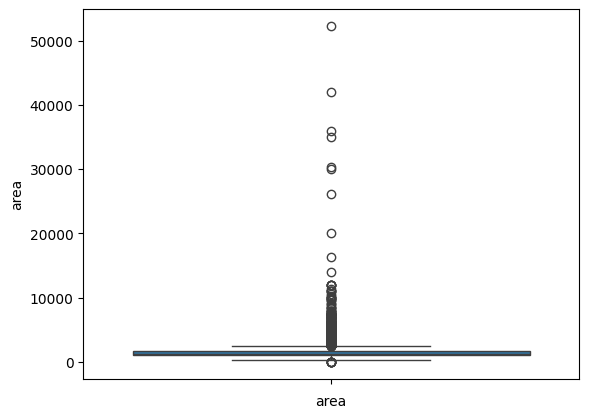

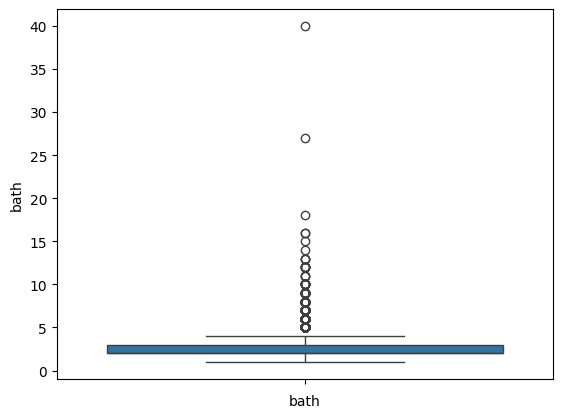

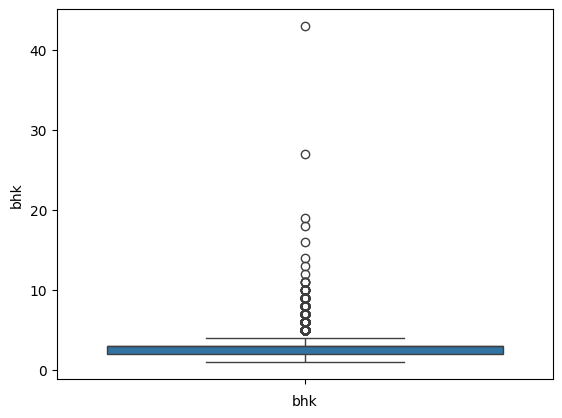

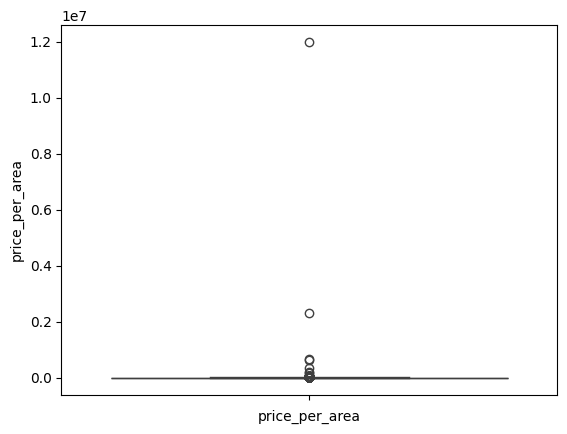

In [182]:
# Checking and handling outliers
sn.boxplot(df9.area)
plt.xlabel('area')
plt.show()

sn.boxplot(df9.bath)
plt.xlabel('bath')
plt.show()

sn.boxplot(df9.bhk)
plt.xlabel('bhk')
plt.show()

sn.boxplot(df9.price_per_area)
plt.xlabel('price_per_area')
plt.show()

In [187]:
features = ['area','bhk','bath','price_per_area']
for feature in features:
    percentile75 = df9[feature].quantile(0.75)
    percentile25 = df9[feature].quantile(0.25)
    IQR = percentile75 - percentile25
    upper_limit = percentile75 + (1.5*IQR)
    lower_limit = percentile25 - (1.5*IQR)
    df9.loc[df9[feature]<=lower_limit,feature] = lower_limit # capping the outliers
    df9.loc[df9[feature]>=upper_limit,feature] = upper_limit

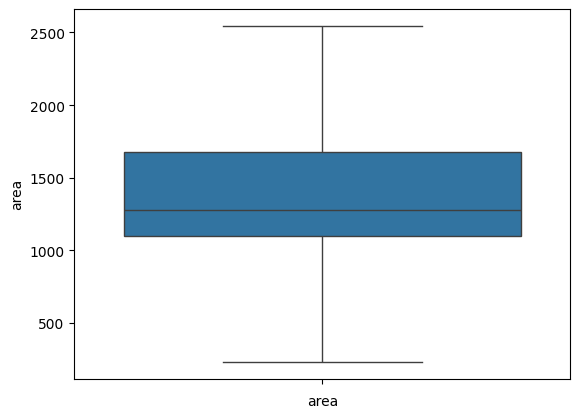

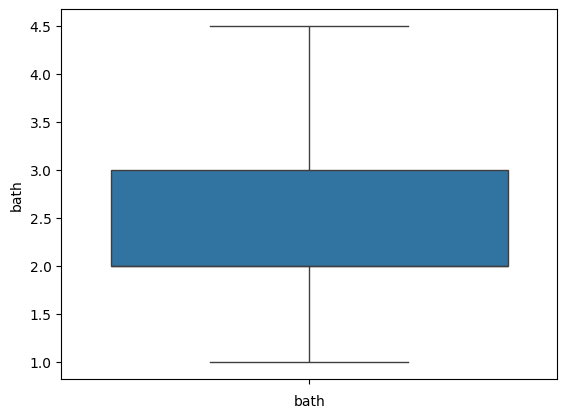

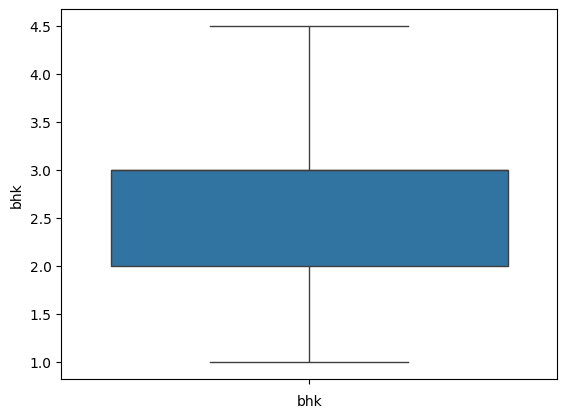

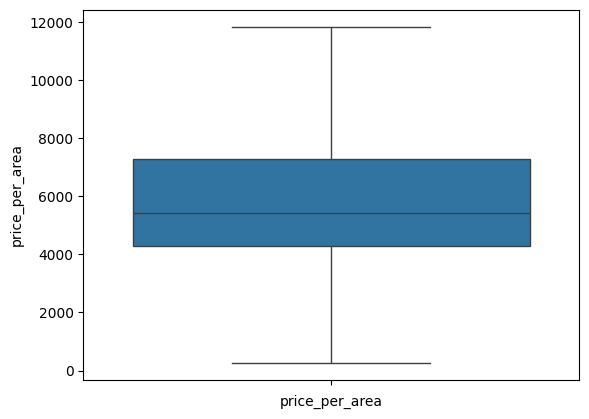

In [189]:
# Removed all outliers
sn.boxplot(df9.area)
plt.xlabel('area')
plt.show()

sn.boxplot(df9.bath)
plt.xlabel('bath')
plt.show()

sn.boxplot(df9.bhk)
plt.xlabel('bhk')
plt.show()

sn.boxplot(df9.price_per_area)
plt.xlabel('price_per_area')
plt.show()

In [190]:
print('Correlation between area and price\n',df6[['area','price']].corr())
print('Correlation between bhk and price\n',df6[['bhk','price']].corr())
print('Correlation between bath and price\n',df6[['bath','price']].corr())
print('Correlation between price_per_area and price\n',df6[['price_per_area','price']].corr())

Correlation between area and price
            area     price
area   1.000000  0.574721
price  0.574721  1.000000
Correlation between bhk and price
             bhk     price
bhk    1.000000  0.398075
price  0.398075  1.000000
Correlation between bath and price
            bath     price
bath   1.000000  0.454449
price  0.454449  1.000000
Correlation between price_per_area and price
                 price_per_area     price
price_per_area        1.000000  0.028357
price                 0.028357  1.000000


In [195]:
df6['location'].value_counts()[df6.location.value_counts()<10]
# df9.head()

Series([], Name: count, dtype: int64)

In [124]:
df9.shape

(13320, 6)

In [219]:
df6['location'].fillna('Unknown', inplace=True)
df6['location'] = df6['location'].apply(lambda x: 'Other' if df6['location'].value_counts()[x] <= 10 else x)
df6.head(10)
# df6.isnull().sum()

,location,bath,price,bhk,area,price_per_area
0,Electronic City Phase II,2.0,39.07,2.0,1056.0,3699.810606
1,Chikka Tirupathi,5.0,120.00,4.0,2600.0,4615.384615
2,Uttarahalli,2.0,62.00,3.0,1440.0,4305.555556
3,Lingadheeranahalli,3.0,95.00,3.0,1521.0,6245.890861
4,Kothanur,2.0,51.00,2.0,1200.0,4250.000000
5,Whitefield,2.0,38.00,2.0,1170.0,3247.863248
6,Old Airport Road,4.0,204.00,4.0,2732.0,7467.057101
7,Rajaji Nagar,4.0,600.00,4.0,3300.0,18181.818182
8,Marathahalli,3.0,63.25,3.0,1310.0,4828.244275
9,Other,6.0,370.00,6.0,1020.0,36274.509804


In [220]:
df7 = df6.copy()
df8 = pd.get_dummies(df7).astype(float)
df8.head()

,bath,price,bhk,area,price_per_area,location_ Devarachikkanahalli,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,2.0,39.07,2.0,1056.0,3699.810606,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,120.00,4.0,2600.0,4615.384615,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,62.00,3.0,1440.0,4305.555556,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,95.00,3.0,1521.0,6245.890861,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,51.00,2.0,1200.0,4250.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [200]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Columns: 247 entries, bath to location_Yeshwanthpur
dtypes: float64(247)
memory usage: 25.1 MB


In [225]:
x = df8.drop(['price'],axis=1)
y = df8.price

x_train , x_test, y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=10)
x_train.shape, y_train.shape, x_test.shape , y_test.shape

((9324, 246), (9324,), (3996, 246), (3996,))

In [226]:
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [232]:
model1 = LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [235]:
print('R2 score for Random forest=',r2_score(y_test,model.predict(x_test)))
print('mean absolute error for Random forest =',mean_absolute_percentage_error(y_test,model.predict(x_test)))

R2 score for Random forest= 0.931725180722823
mean absolute error for Random forest = 0.022467582047286265


In [237]:
df7 = df9.copy()
df8 = pd.get_dummies(df7).astype(float)
df8.head()

x = df8.drop(['price'],axis=1)
y = df8.price

x_train , x_test, y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=10)
x_train.shape, y_train.shape, x_test.shape , y_test.shape

model1 = LinearRegression()
model1.fit(x_train,y_train)

print('R2 score for Linear Regression=',r2_score(y_test,model1.predict(x_test)))
print('mean absolute error for Linear Regression =',mean_absolute_percentage_error(y_test,model1.predict(x_test)))

R2 score for Linear Regression= 0.4273818371633351
mean absolute error for Linear Regression = 0.46329899617798465
